## ATTEMPT #2

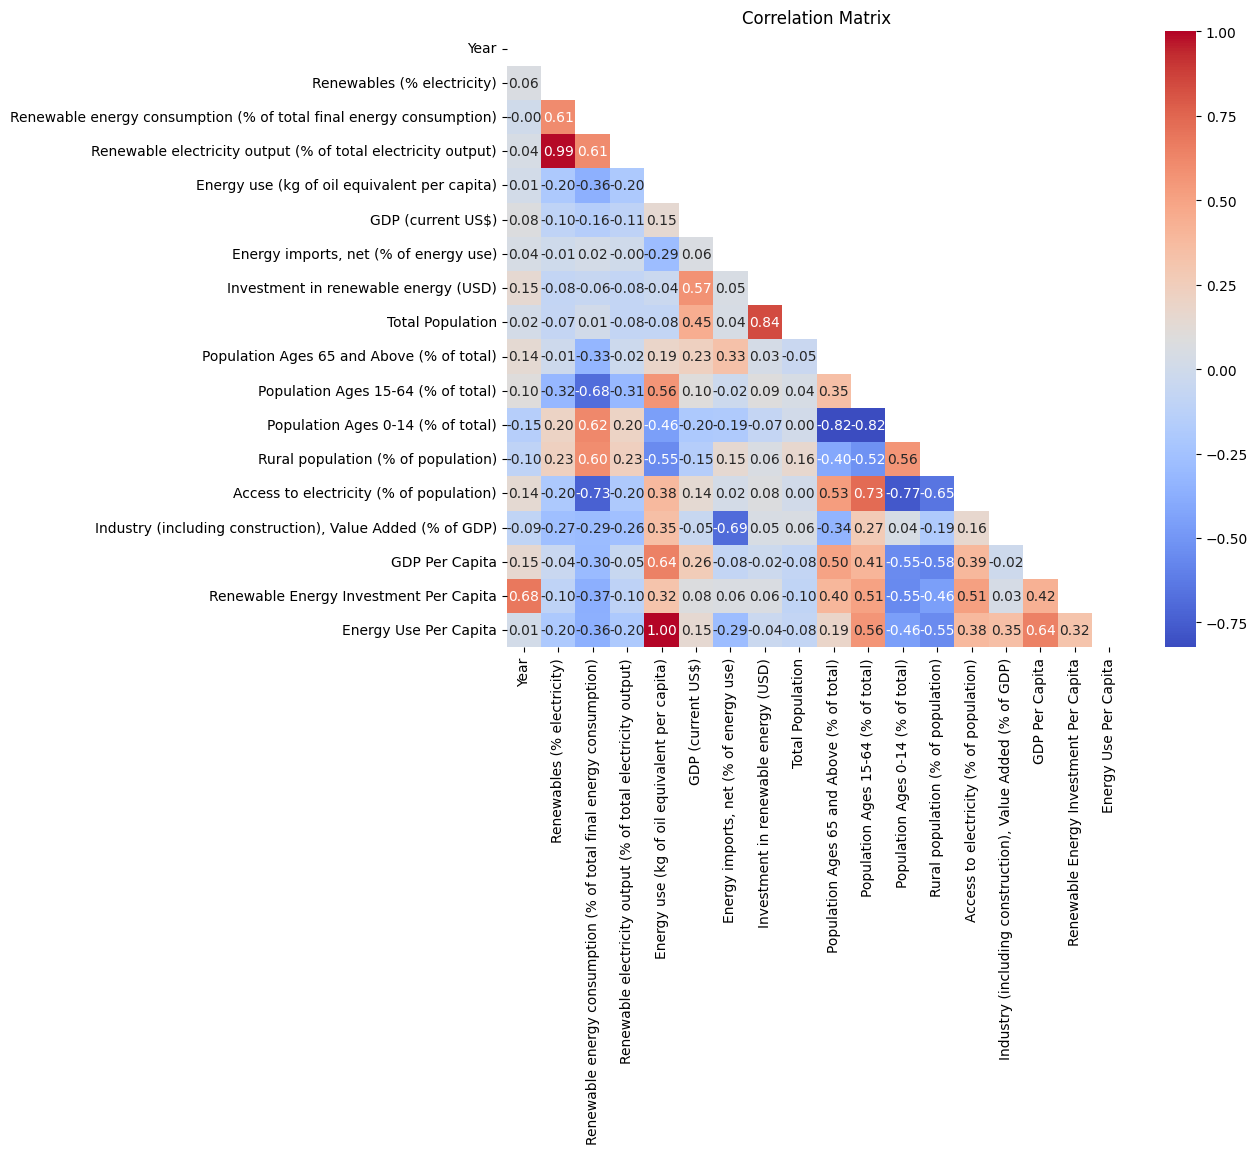

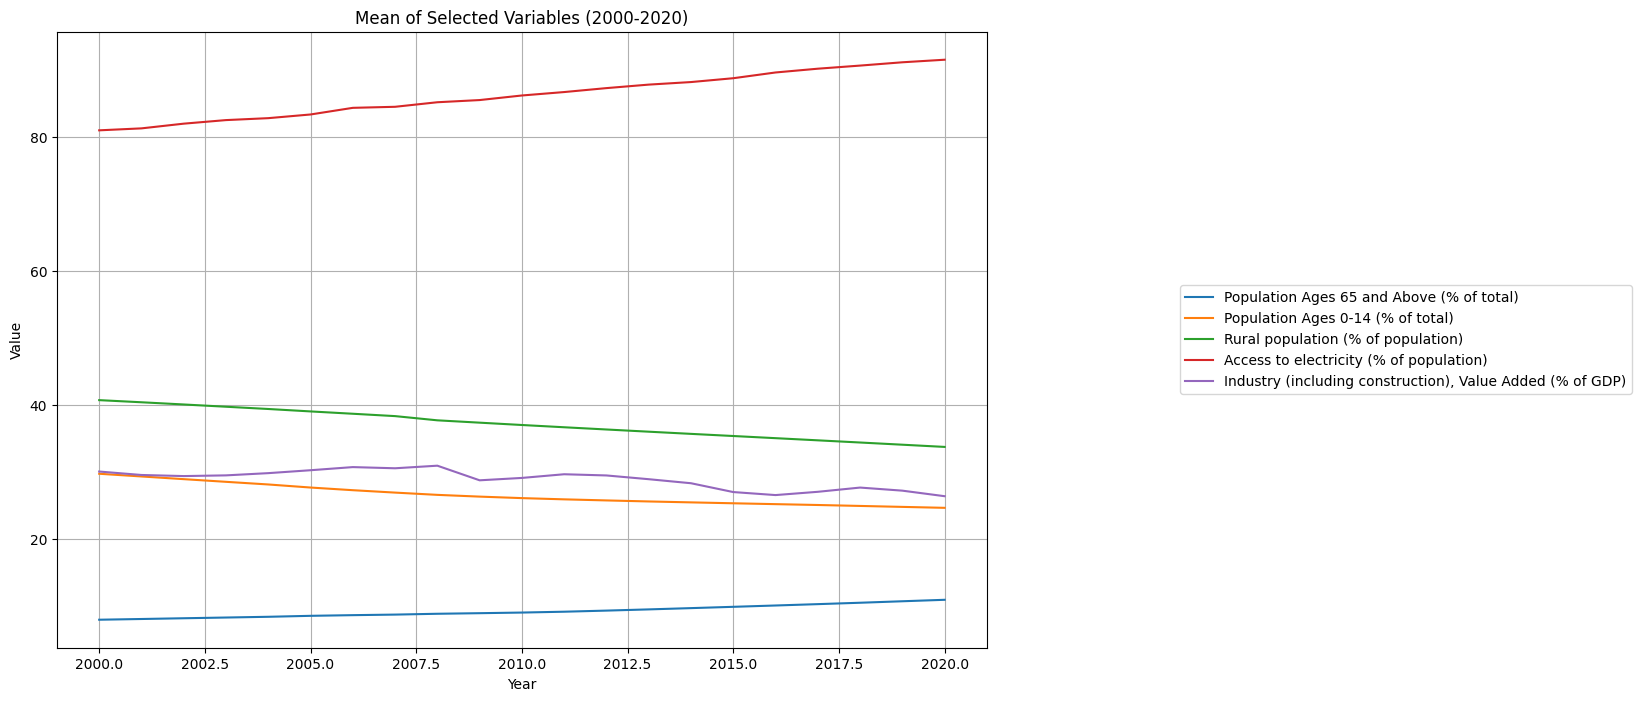

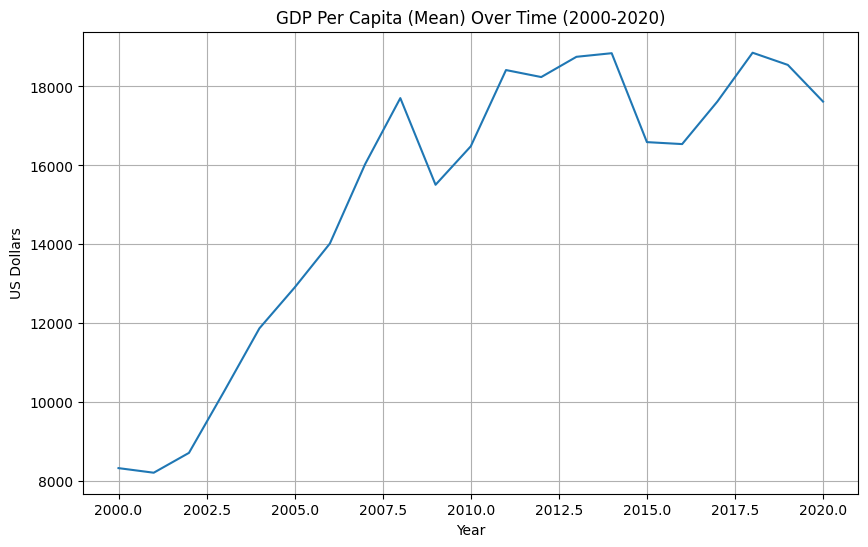

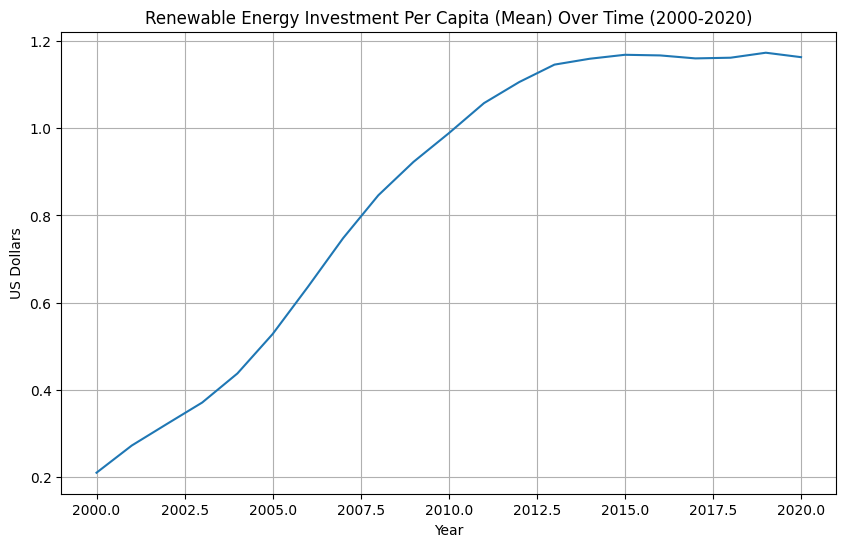

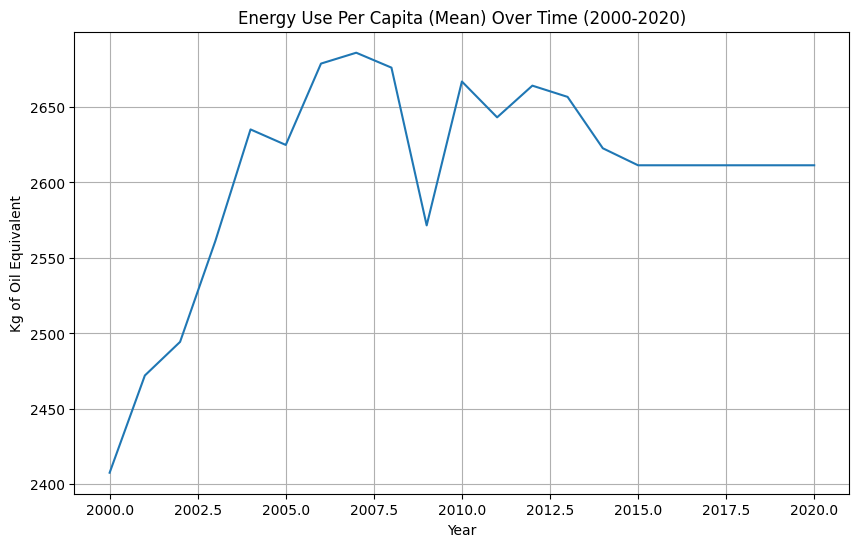

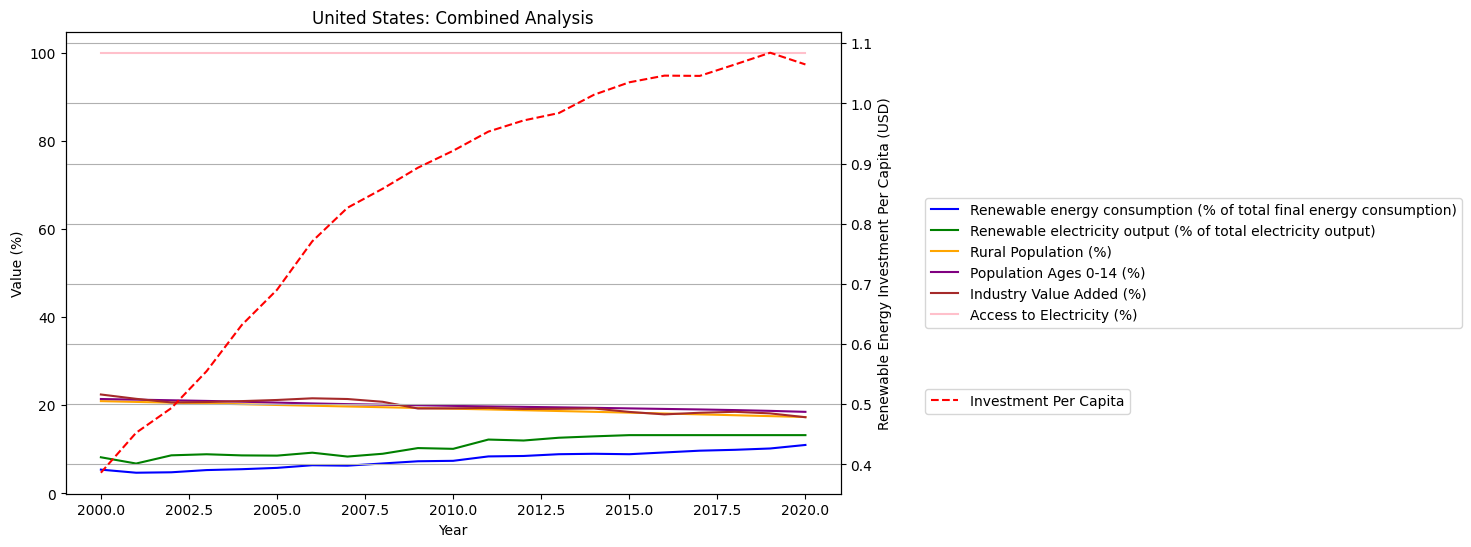

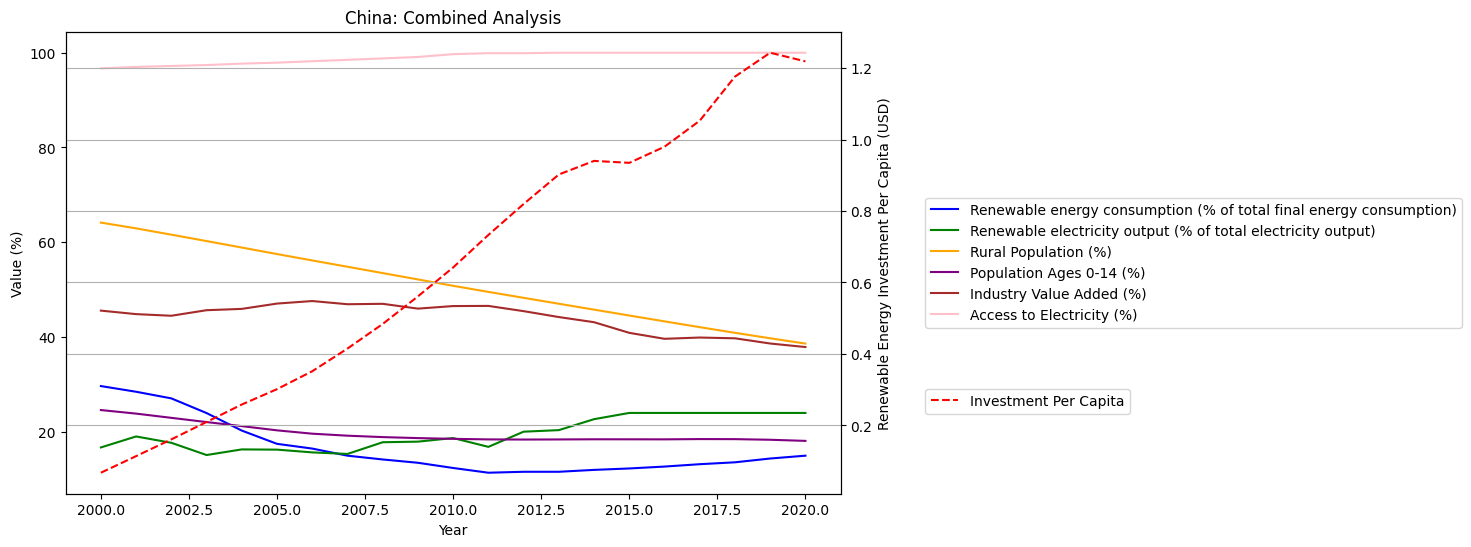

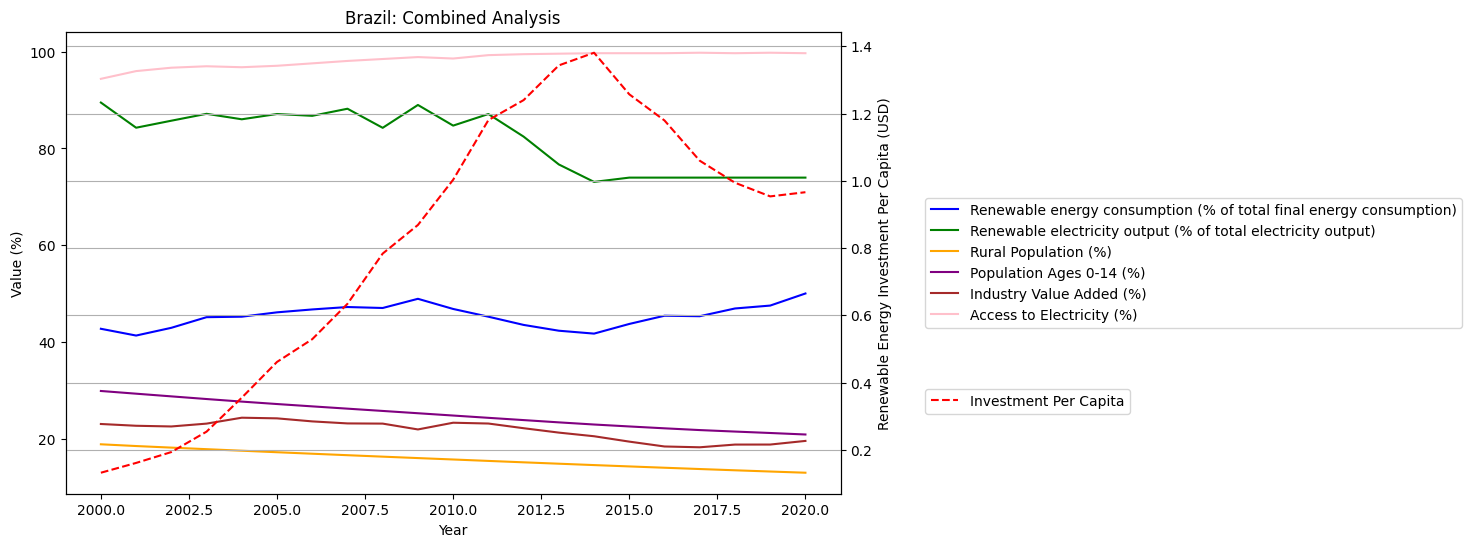

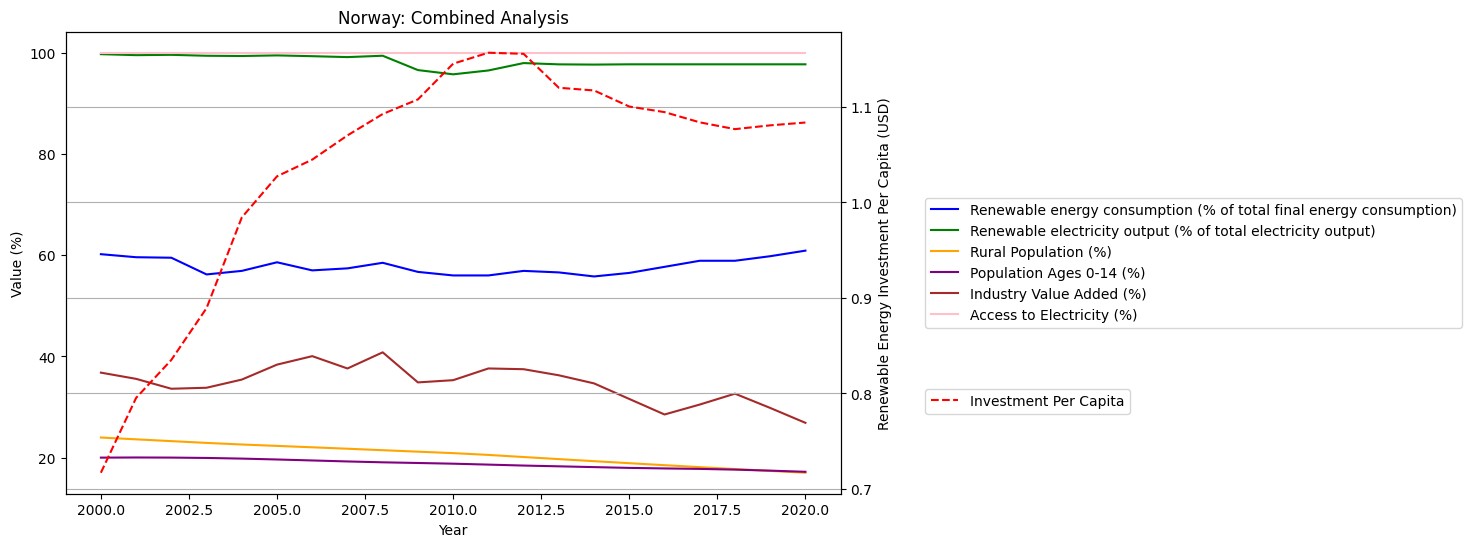

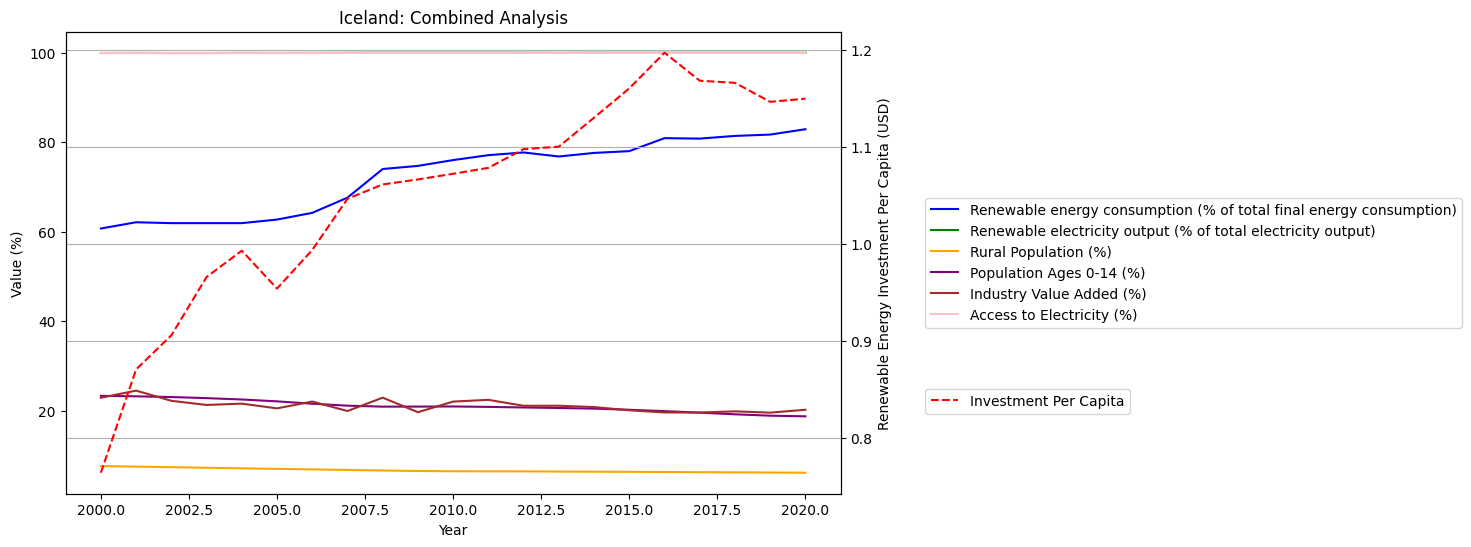

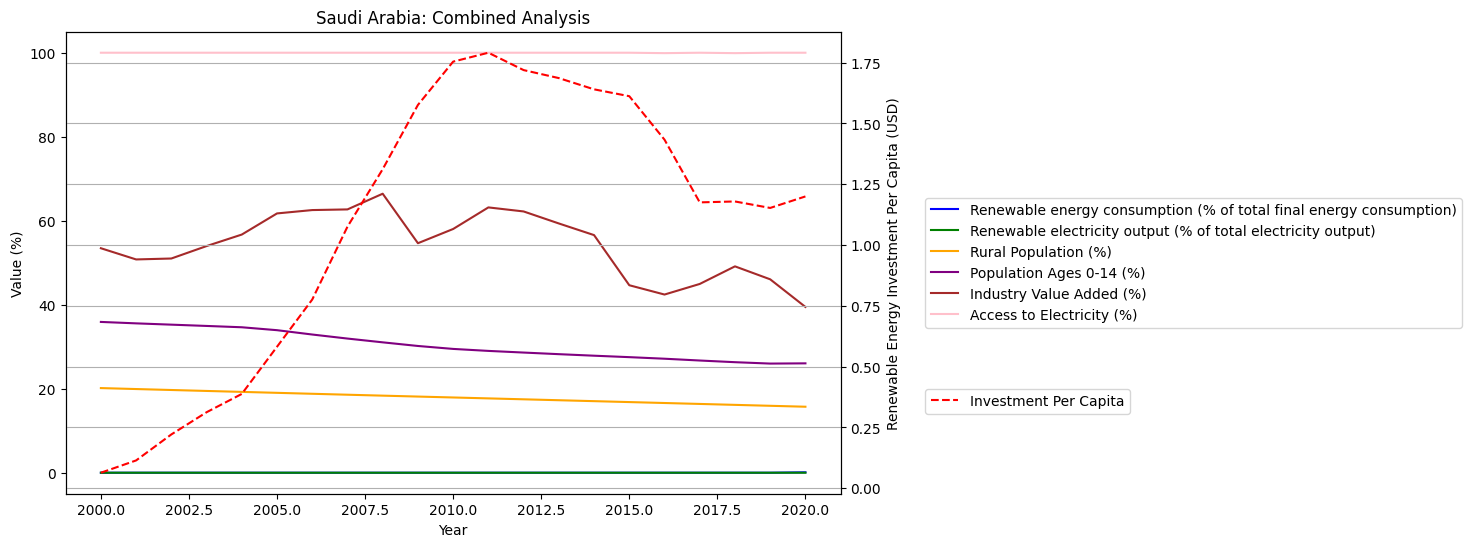

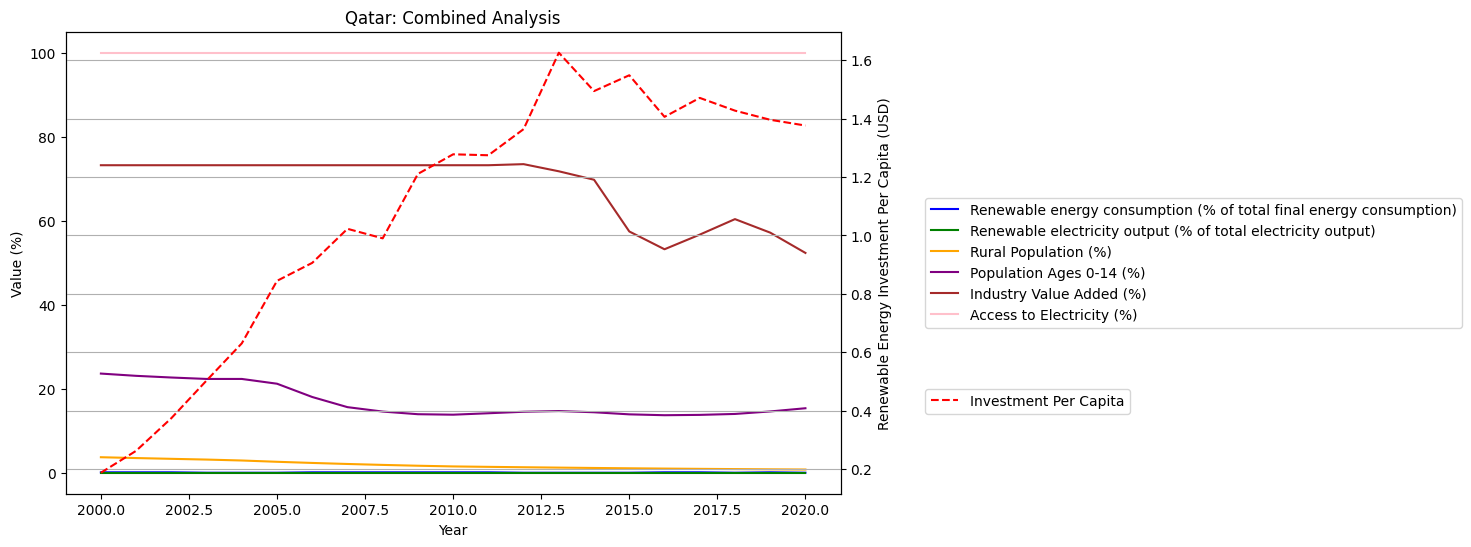

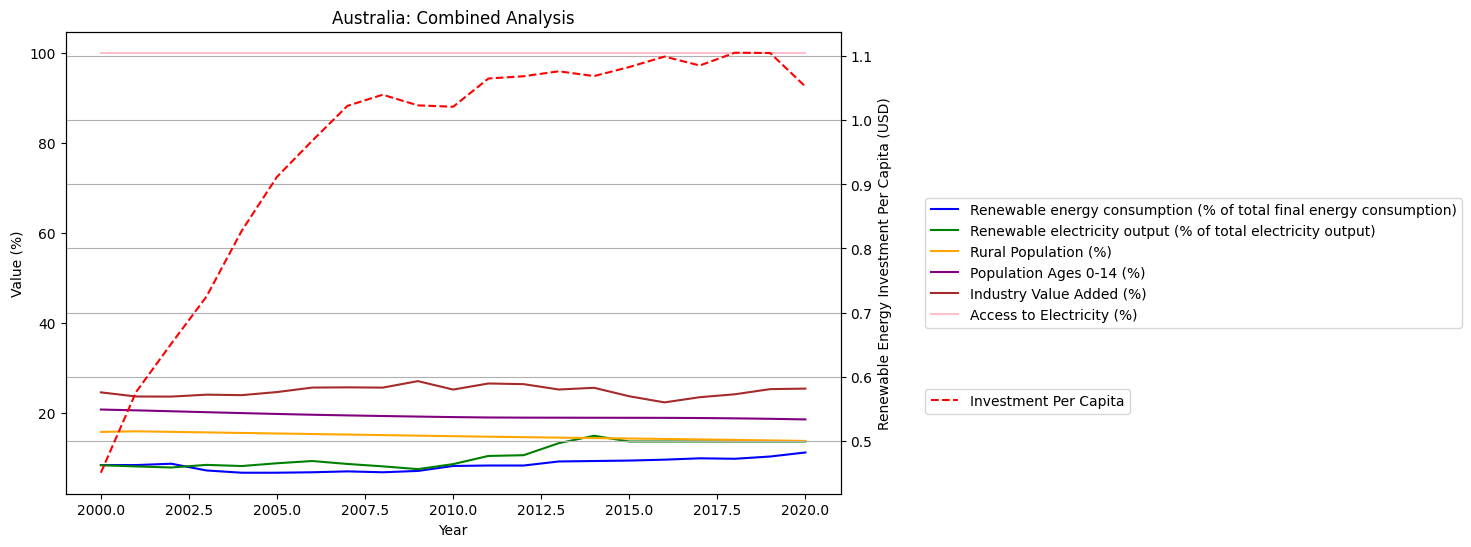

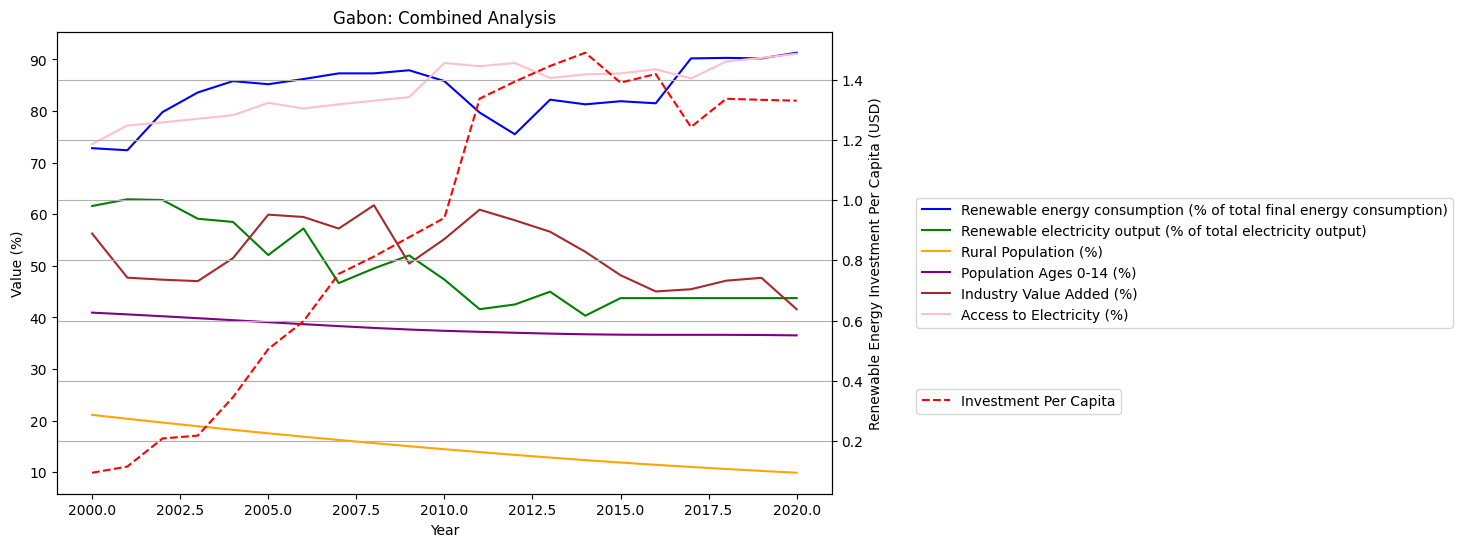

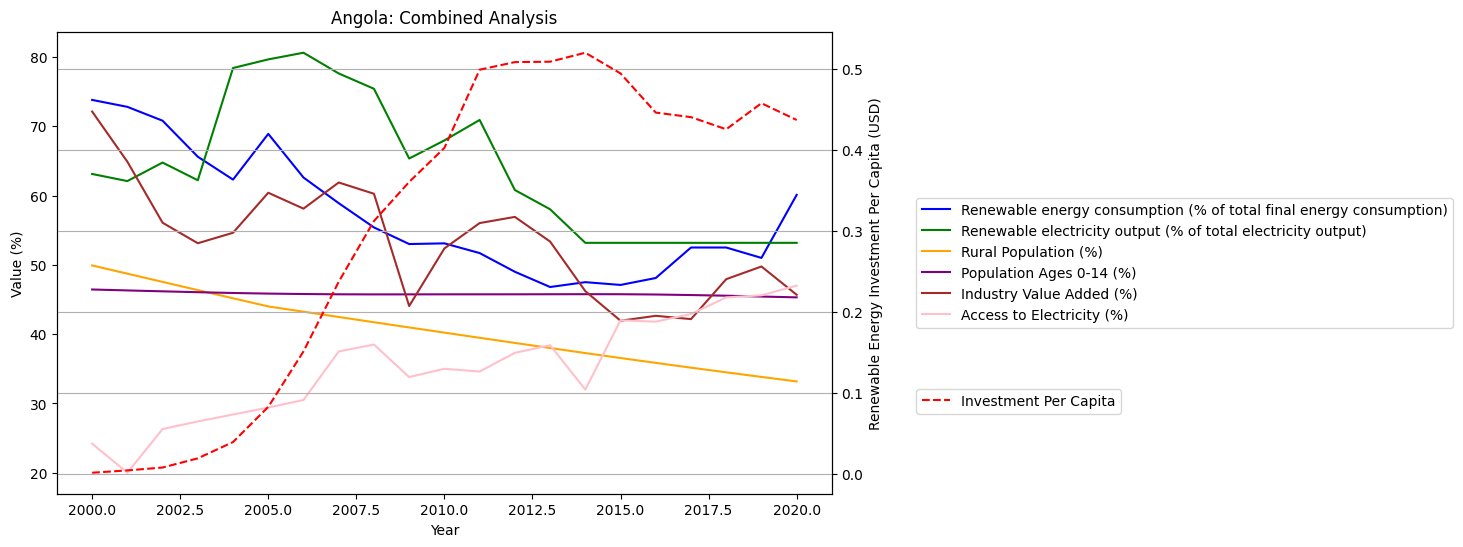

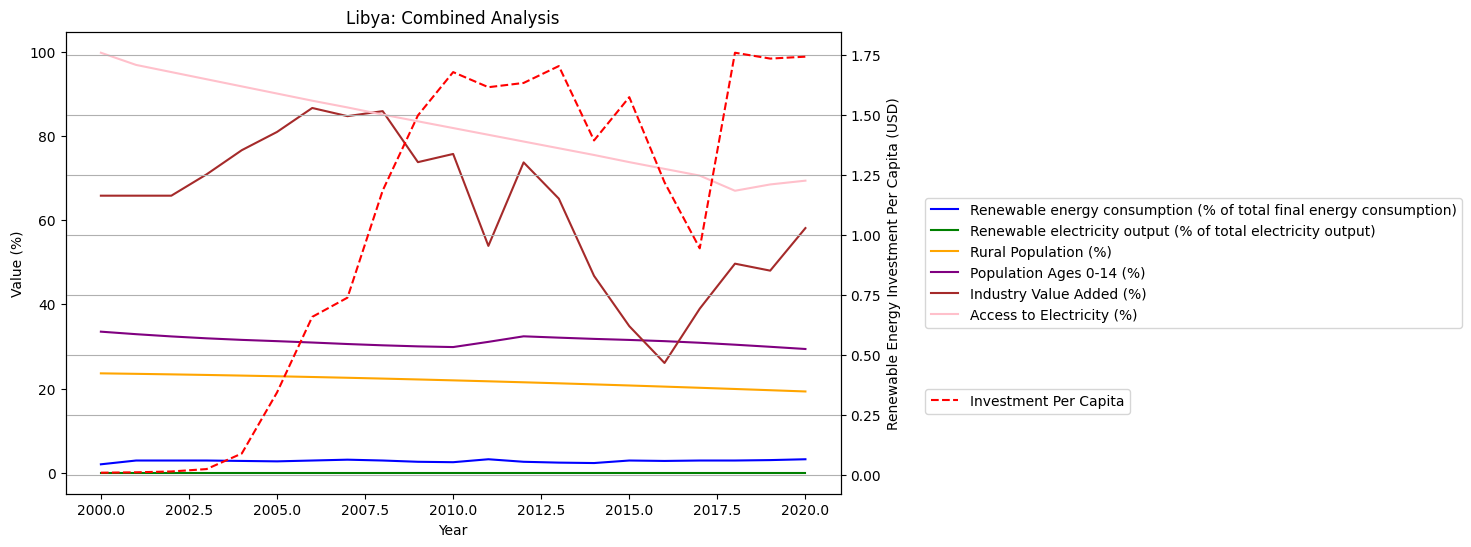

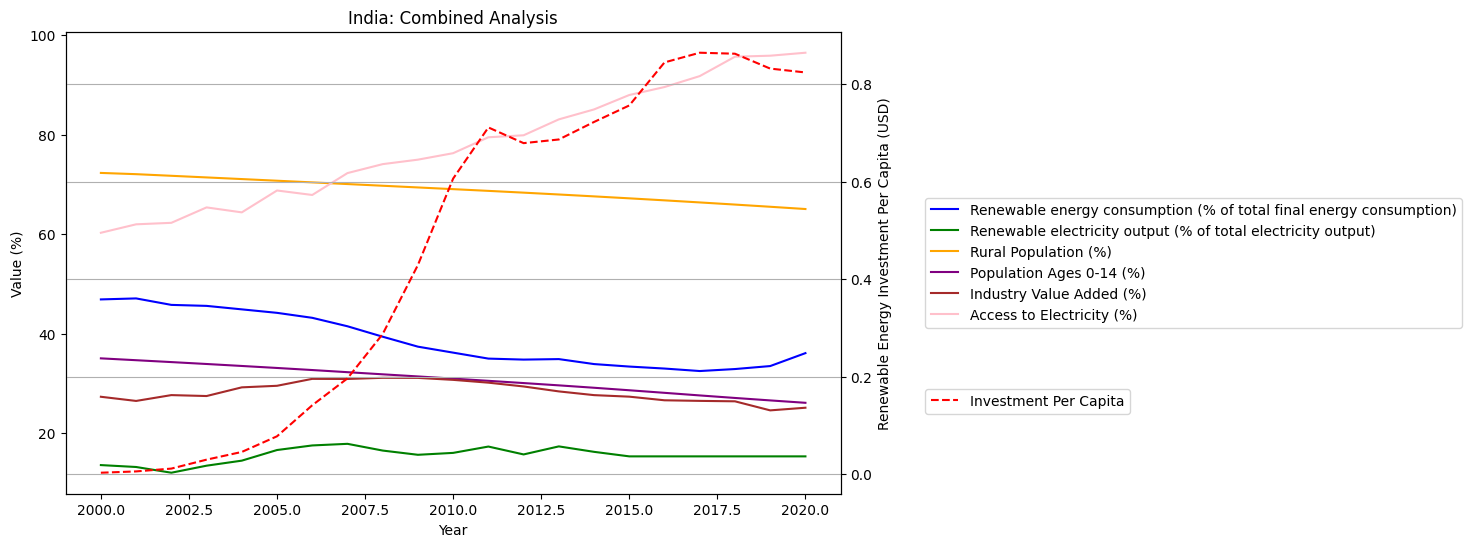

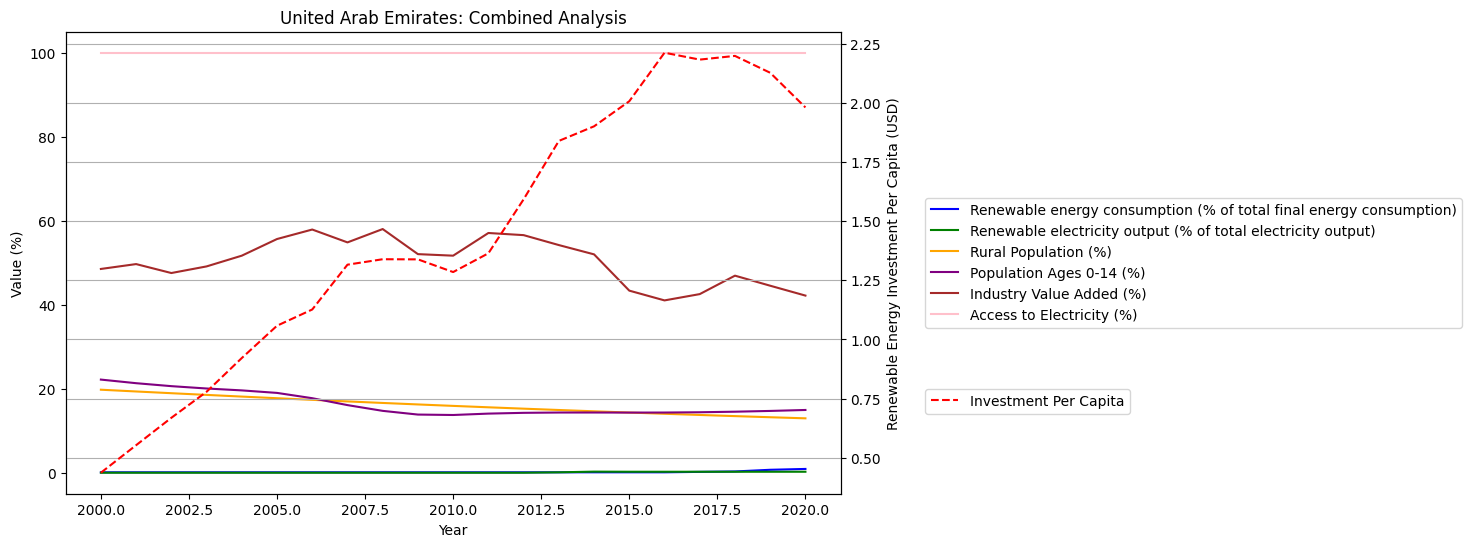

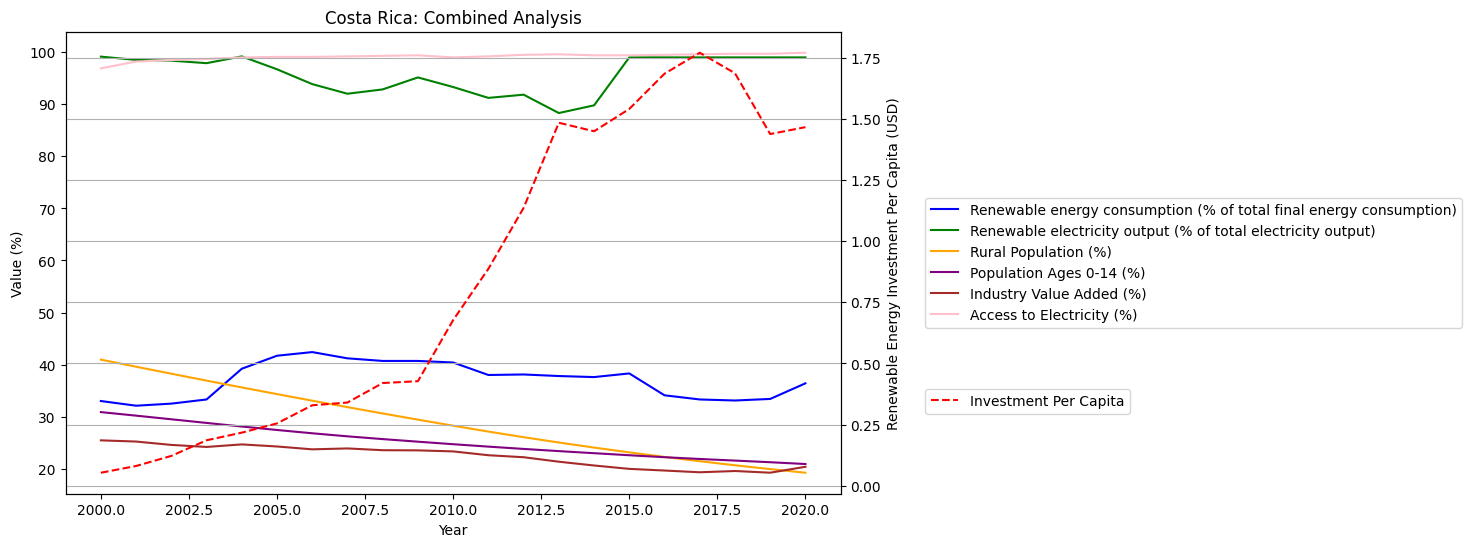

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'kaggle_plus_worldbank_joined_uncleaned_v4.csv'
df = pd.read_csv(file_path)

# Convert Year to datetime and filter for 2000-2020
df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Feature engineering: create per capita variables
df['GDP Per Capita'] = df['GDP (current US$)'] / df['Total Population']
df['Renewable Energy Investment Per Capita'] = df['Investment in renewable energy (USD)'] / df['Total Population']
df['Energy Use Per Capita'] = df['Energy use (kg of oil equivalent per capita)']

# Summary statistics
summary_stats = df.describe()

# Correlation matrix for numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()

# Extract correlation of all features with the target variables
target_vars = [
    "Renewable energy consumption (% of total final energy consumption)",
    "Renewable electricity output (% of total electricity output)"
]
corr_target = correlation_matrix.loc[:, target_vars]

# Plot correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png', bbox_inches='tight')
plt.show()

# Time series analysis: mean variables across all countries
variables = [
    "Population Ages 65 and Above (% of total)",
    "Population Ages 0-14 (% of total)",
    "Rural population (% of population)",
    "Access to electricity (% of population)",
    "Industry (including construction), Value Added (% of GDP)"
]
mean_df = df.groupby('Year')[variables].mean()

# Plot time series for selected variables
fig, ax = plt.subplots(figsize=(12, 8))
mean_df.plot(ax=ax)
plt.title("Mean of Selected Variables (2000-2020)")
plt.ylabel("Value")
plt.xlabel("Year")
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))  # Legend further to the right
plt.grid()
plt.savefig('mean_of_selected_variables_2000_2020.png', bbox_inches='tight')
plt.show()

# Plot time series for GDP Per Capita
gdp_per_capita = df.groupby('Year')['GDP Per Capita'].mean()
plt.figure(figsize=(10, 6))
plt.plot(gdp_per_capita, label="GDP Per Capita (Mean)")
plt.title("GDP Per Capita (Mean) Over Time (2000-2020)")
plt.xlabel("Year")
plt.ylabel("US Dollars")
plt.grid()
plt.savefig('gdp_per_capita_mean_over_time_2000_2020.png', bbox_inches='tight')
plt.show()

# Plot time series for Renewable Energy Investment Per Capita
investment_per_capita = df.groupby('Year')['Renewable Energy Investment Per Capita'].mean()
plt.figure(figsize=(10, 6))
plt.plot(investment_per_capita, label="Investment Per Capita (Mean)")
plt.title("Renewable Energy Investment Per Capita (Mean) Over Time (2000-2020)")
plt.xlabel("Year")
plt.ylabel("US Dollars")
plt.grid()
plt.savefig('renewable_energy_investment_per_capita_mean_over_time_2000_2020.png', bbox_inches='tight')
plt.show()

# Plot time series for Energy Use Per Capita
energy_use_per_capita = df.groupby('Year')['Energy Use Per Capita'].mean()
plt.figure(figsize=(10, 6))
plt.plot(energy_use_per_capita, label="Energy Use Per Capita (Mean)")
plt.title("Energy Use Per Capita (Mean) Over Time (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Kg of Oil Equivalent")
plt.grid()
plt.savefig('energy_use_per_capita_mean_over_time_2000_2020.png', bbox_inches='tight')
plt.show()

# Focused EDA for specific countries
countries = [
    "United States", "China", "Brazil", "Norway", "Iceland", 
    "Saudi Arabia", "Qatar", "Australia", "Gabon", "Angola", 
    "Libya", "India", "United Arab Emirates", "Costa Rica"
]
df_countries = df[df['Entity'].isin(countries)]

# Plot target variables and additional variables with investment per capita
for country in countries:
    country_data = df_countries[df_countries['Entity'] == country]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot % variables on left y-axis
    ax1.plot(country_data['Year'], country_data[target_vars[0]], label=target_vars[0], color='blue')
    ax1.plot(country_data['Year'], country_data[target_vars[1]], label=target_vars[1], color='green')
    ax1.plot(country_data['Year'], country_data['Rural population (% of population)'], label="Rural Population (%)", color='orange')
    ax1.plot(country_data['Year'], country_data["Population Ages 0-14 (% of total)"], label="Population Ages 0-14 (%)", color='purple')
    ax1.plot(country_data['Year'], country_data["Industry (including construction), Value Added (% of GDP)"], label="Industry Value Added (%)", color='brown')
    ax1.plot(country_data['Year'], country_data["Access to electricity (% of population)"], label="Access to Electricity (%)", color='pink')
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Value (%)")
    ax1.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))  # Legend further to the right
    
    # Plot investment per capita on right y-axis
    ax2 = ax1.twinx()
    ax2.plot(country_data['Year'], country_data['Renewable Energy Investment Per Capita'], label="Investment Per Capita", color='red', linestyle='--')
    ax2.set_ylabel("Renewable Energy Investment Per Capita (USD)")
    ax2.legend(loc="center left", bbox_to_anchor=(1.1, 0.2))  # Legend further to the right
    
    plt.title(f"{country}: Combined Analysis")
    plt.grid()
    plt.savefig(f"{country.lower().replace(' ', '_')}_combined_analysis.png", bbox_inches='tight')
    plt.show()
